<a href="https://colab.research.google.com/github/abhishek8890/round-robin/blob/master/Activity_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [0]:
#Importing the models ans preprocessing functions
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



In [4]:

from google.colab import files
uploaded = files.upload()
import io
train_data= pd.read_csv(io.BytesIO(uploaded['train.csv']))





Saving train.csv to train.csv


In [5]:
from google.colab import files
uploaded = files.upload()
import io
test_data= pd.read_csv(io.BytesIO(uploaded['test.csv']))


Saving test.csv to test.csv


In [0]:
#Dividing the dataset into test and train datasets
y_train=train_data['Activity']
x_train= train_data.drop(columns = ['Activity', 'subject'])

y_test=test_data['Activity']
x_test= test_data.drop(columns = ['Activity', 'subject'])

In [0]:
#Filling the missing values
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
x_train=imp.fit_transform(x_train)
x_test=imp.fit(x_test)


([<matplotlib.patches.Wedge at 0x7ff6261903c8>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

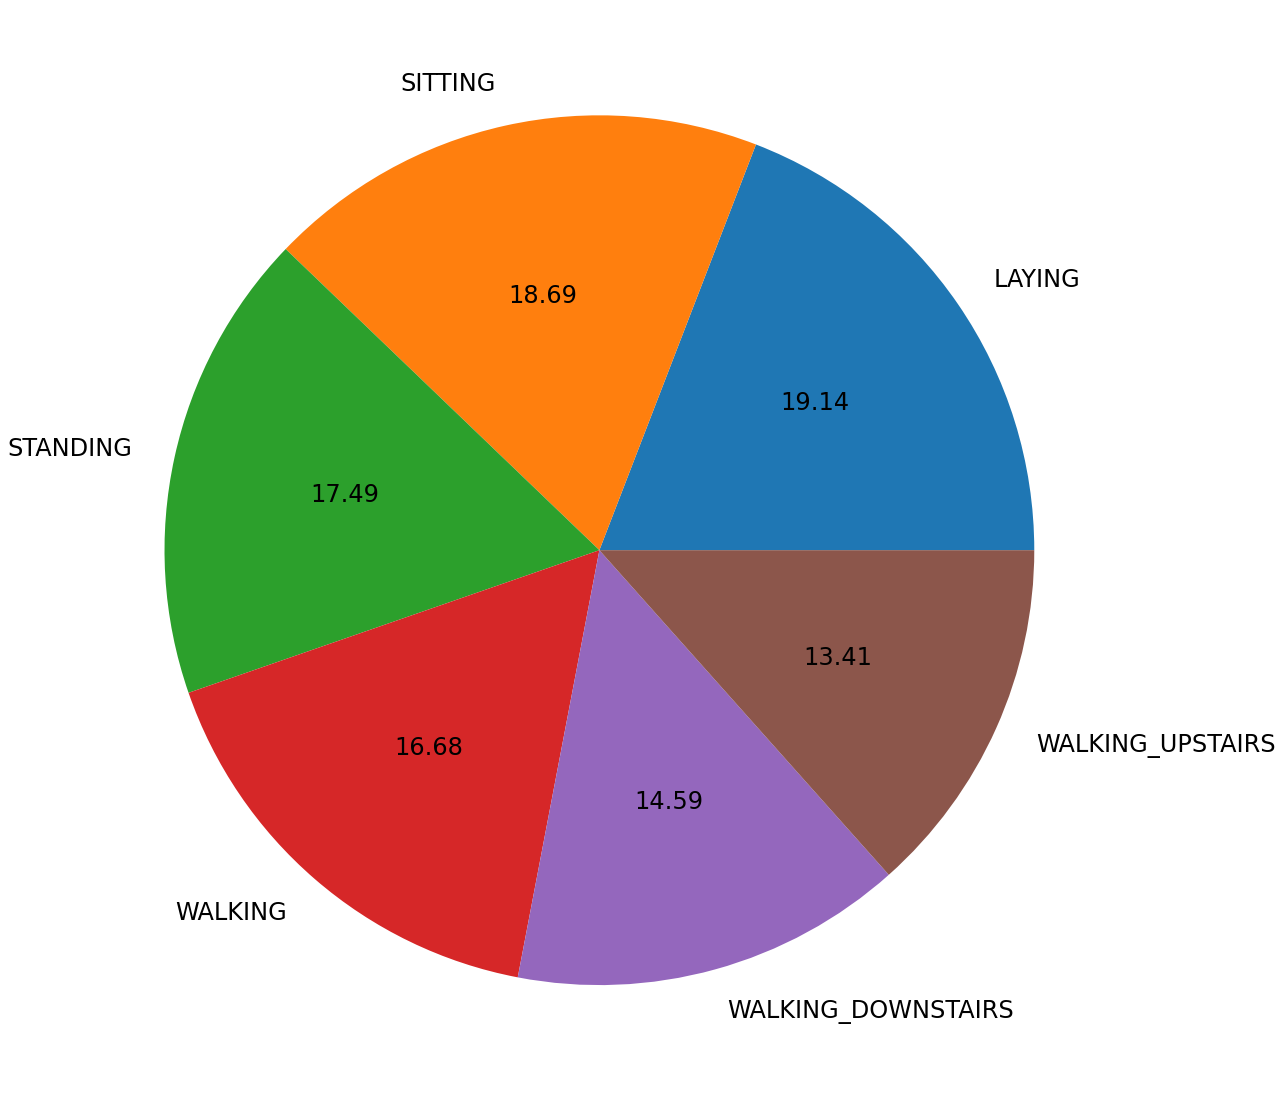

In [11]:
count_of_each_activity = np.array(y_train.value_counts())

# Identify all the unqiue activities and in sorted order
activities = sorted(y_train.unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

In [22]:
accuracy_scores = np.zeros(4)

# Support Vector Classifier
from sklearn.svm import SVC
clf = SVC().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))


# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))


# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))


# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))


Support Vector Classifier accuracy: 95.04580929759076%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression accuracy: 95.79233118425518%
K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 93.11163895486936%


Text(0.5, 1.0, 'Accuracy of various algorithms')

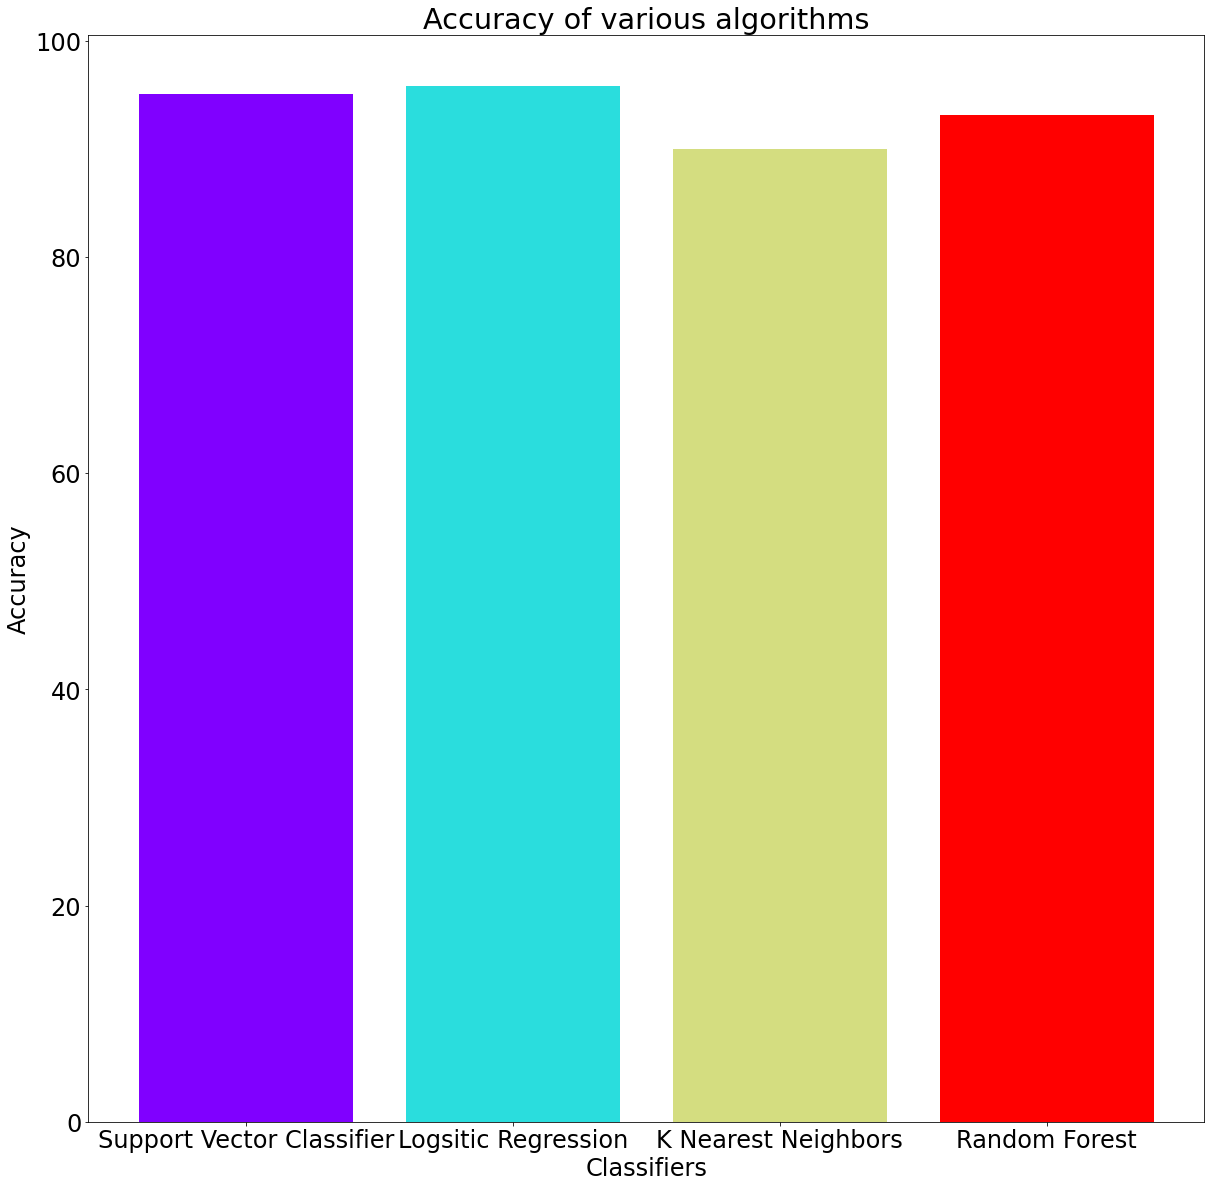

In [24]:
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')